# Trabalho 2 - AM 2023/1 #

Dataset: E-Commerce Data

https://www.kaggle.com/datasets/carrie1/ecommerce-data/


Carlos Pereira de Castro Neto

Vivian Ferreira Margarido

Luan Dias Rodrigues

Filipe Gabriel Soares Pereira Rodrigues

In [1]:
import pandas as pd
pd.set_option('display.max_colwidth',100)

# Importa o dataset
path = "datasets/data.csv"
df = pd.read_csv(path, encoding="ISO-8859-1")

In [2]:
print("Amostra de dados:")
df.head(5)

Amostra de dados:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
import re
# Converte formato das colunas
df['InvoiceNo'] = df['InvoiceNo'].astype(str)
df['Description'] = df['Description'].astype(str)

# Retira espacos extras
df['Description'] = df['Description'].str.strip()

# Remove operacoes marcadas como canceladas
df = df[~df['InvoiceNo'].str.contains('C')]

def remove_numbers_and_special_chars(text):
    if text[0] == " ":
        text = text[1:]
    return ''.join([char for char in text if char.isalpha() or char.isspace()])

# Remove caracteres especiais
df['Description'] = df['Description'].apply(remove_numbers_and_special_chars)

In [4]:
df.count()

InvoiceNo      532621
StockCode      532621
Description    532621
Quantity       532621
InvoiceDate    532621
UnitPrice      532621
CustomerID     397924
Country        532621
dtype: int64

In [5]:
print("Informacoes sobre o dataset:")
df.info()

Informacoes sobre o dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 532621 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    532621 non-null  object 
 1   StockCode    532621 non-null  object 
 2   Description  532621 non-null  object 
 3   Quantity     532621 non-null  int64  
 4   InvoiceDate  532621 non-null  object 
 5   UnitPrice    532621 non-null  float64
 6   CustomerID   397924 non-null  float64
 7   Country      532621 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 36.6+ MB


In [6]:
missing_values = df.isnull().sum().sort_values(ascending=False)
print("Valores faltantes:")
print(missing_values)

Valores faltantes:
CustomerID     134697
InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64


In [7]:
# Contar o número de InvoiceNo diferentes
num_unique_invoice = df['InvoiceNo'].nunique()

# Contar o número de Description diferentes
num_unique_desc = df['Description'].nunique()

# Contar o número de StockCode diferentes
num_unique_stock = df['StockCode'].nunique()

# Calcular a quantidade total da coluna 'Quantity'
total_quantity = df['Quantity'].sum()

# Converter a coluna 'InvoiceDate' para o formato de data.
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Contar o número de CustomerID diferentes
num_unique_costumers = df['CustomerID'].nunique()

first_invoice_date = df['InvoiceDate'].min()
last_invoice_date = df['InvoiceDate'].max()
delta_time = last_invoice_date - first_invoice_date

print(f"Existem {num_unique_invoice} faturas diferentes.")
print(f"Existem {num_unique_stock} codigos de armazenagem diferentes.")
print(f"Existem {num_unique_desc} descricoes diferentes.")
print(f"Existe {total_quantity} itens vendidos nesse dataset.")
print(f"Periodo de vendas de {first_invoice_date} entre {last_invoice_date}, totalizando {delta_time}")
print(f"Existem {num_unique_costumers} clientes diferentes.")


Existem 22064 faturas diferentes.
Existem 4059 codigos de armazenagem diferentes.
Existem 4108 descricoes diferentes.
Existe 5454024 itens vendidos nesse dataset.
Periodo de vendas de 2010-12-01 08:26:00 entre 2011-12-09 12:50:00, totalizando 373 days 04:24:00
Existem 4339 clientes diferentes.


In [8]:
df_count = df.groupby('Country').size().reset_index(name='count').sort_values(by='count', ascending=False)
print(df_count)

                 Country   count
36        United Kingdom  487622
14               Germany    9042
13                France    8408
10                  EIRE    7894
31                 Spain    2485
24           Netherlands    2363
3                Belgium    2031
33           Switzerland    1967
27              Portugal    1501
0              Australia    1185
25                Norway    1072
19                 Italy     758
6        Channel Islands     748
12               Finland     685
7                 Cyprus     614
32                Sweden     451
37           Unspecified     446
1                Austria     398
9                Denmark     380
26                Poland     330
20                 Japan     321
18                Israel     295
16             Hong Kong     284
30             Singapore     222
17               Iceland     182
34                   USA     179
5                 Canada     151
15                Greece     145
23                 Malta     112
35  United

## Analise por Nº da fatura ##

In [9]:
# Filtra as colunas que queremos
columns_to_keep = ['InvoiceNo', 'Description', 'Quantity']
df_customerid = df[columns_to_keep]

# Cria colunas novas com os valores de Description e com o valor da coluna Quantity
df_customerid = df_customerid.groupby(['InvoiceNo', 'Description'])['Quantity'] \
                            .sum().unstack().reset_index().fillna(0) \
                            .set_index('InvoiceNo')

def hot_encode(x):
    if(x <= 0):
        return 0
    if(x >= 1):
        return 1

# Transforma a quantidade em 1 ou 0 para a entrada do algoritmo
df_customerid = df_customerid.applymap(hot_encode)

from mlxtend.frequent_patterns import apriori, association_rules

#Aplica o algoritmo
frq_items = apriori(df_customerid, min_support = 0.030, use_colnames = True)
frq_items = frq_items.sort_values(by='support', ascending=False)
print(frq_items)

# Extrai as regras
rules = association_rules(frq_items, metric="lift", min_threshold = 1)
rules = rules.sort_values(['confidence', 'lift'], ascending = [False, False])

print(rules)

frq_items["itemsets"] = frq_items["itemsets"].apply(lambda x: str(list(x)).replace("[", "").replace("]", "").replace("'", "")).astype("unicode")
rules["antecedents"] = rules["antecedents"].apply(lambda x: str(list(x)).replace("[", "").replace("]", "").replace("'", "")).astype("unicode")
rules["consequents"] = rules["consequents"].apply(lambda x: str(list(x)).replace("[", "").replace("]", "").replace("'", "")).astype("unicode")

frq_items.to_excel('resultados/frq_items.xlsx', index=False)
rules.to_excel('resultados/rules.xlsx', index=False)

C:\Users\carlo\AppData\Roaming\Python\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


      support                               itemsets
103  0.102429    (WHITE HANGING HEART TLIGHT HOLDER)
39   0.094815              (JUMBO BAG RED RETROSPOT)
83   0.090147              (REGENCY CAKESTAND  TIER)
70   0.076414                        (PARTY BUNTING)
56   0.070885              (LUNCH BAG RED RETROSPOT)
..        ...                                    ...
22   0.030366        (GINGERBREAD MAN COOKIE CUTTER)
59   0.030276        (LUNCH BAG VINTAGE LEAF DESIGN)
66   0.030049            (PACK OF  SKULL CAKE CASES)
11   0.030049                        (CHILLI LIGHTS)
41   0.030004  (JUMBO BAG SCANDINAVIAN BLUE PAISLEY)

[112 rows x 2 columns]
                           antecedents                          consequents  \
3    (GREEN REGENCY TEACUP AND SAUCER)    (ROSES REGENCY TEACUP AND SAUCER)   
2    (ROSES REGENCY TEACUP AND SAUCER)    (GREEN REGENCY TEACUP AND SAUCER)   
0            (JUMBO BAG PINK POLKADOT)            (JUMBO BAG RED RETROSPOT)   
4             (JUMBO STO

C:\Users\carlo\AppData\Roaming\Python\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\carlo\AppData\Roaming\Python\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\carlo\AppData\Roaming\Python\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\carlo\AppData\Roaming\Python\Python311\site-packages\mlxtend\frequent_pat

,Minimo Suporte,Total de Items,Total de Regras
0,0.020,306,118
1,0.025,169,30
2,0.030,112,8
3,0.035,70,2
4,0.040,47,0
5,0.045,34,0
6,0.050,22,0
7,0.055,11,0
8,0.060,7,0
9,0.065,6,0


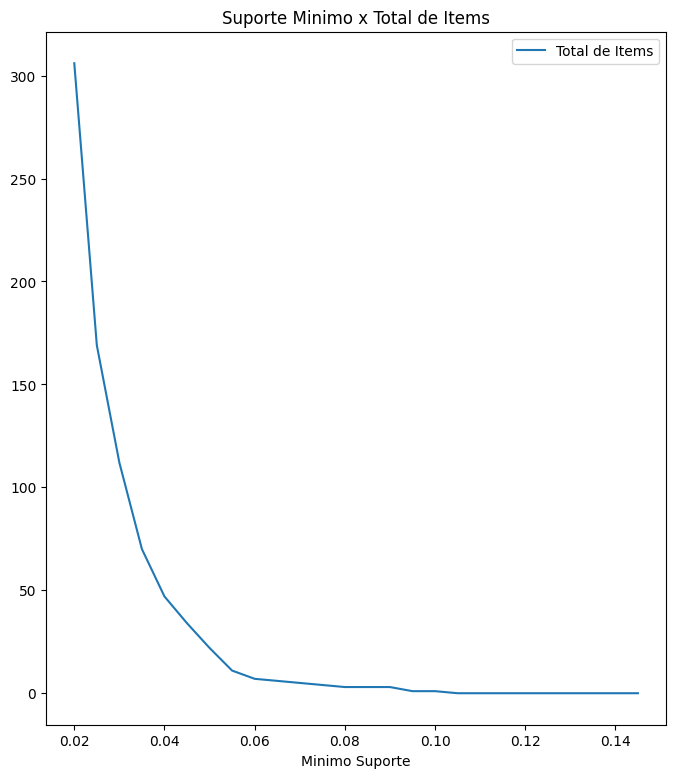

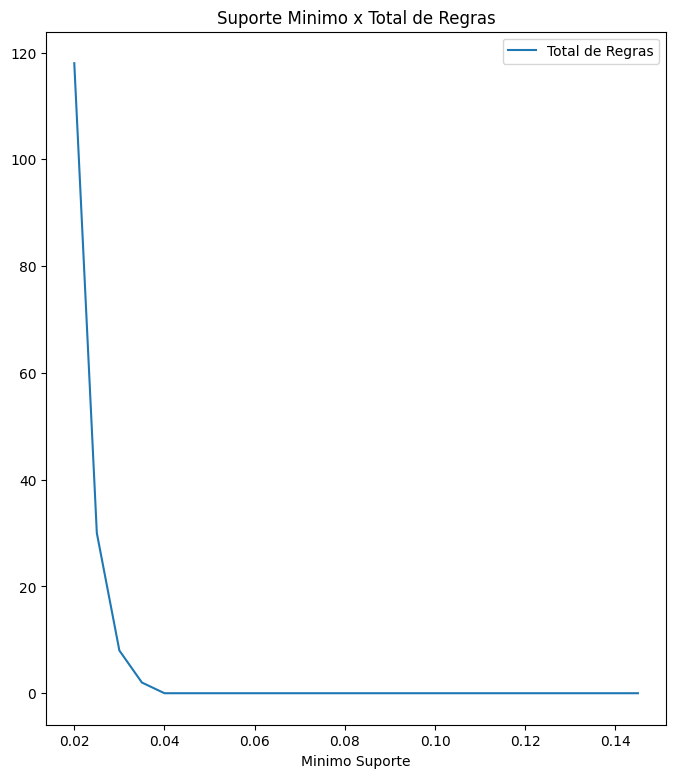

In [10]:
import matplotlib as mpl
i = 0.02
dados = []
while i < 0.15:
    frq_items = apriori(df_customerid, min_support = i, use_colnames = True)
    frq_items = frq_items.sort_values(by='support', ascending=False)
    if frq_items.shape[0] != 0 :
        rules = association_rules(frq_items, metric="lift", min_threshold = 1)
        rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
        dados.append((i, frq_items.shape[0], rules.shape[0]))
    else:
        dados.append((i, frq_items.shape[0], 0))
    i = i + 0.005
pd_df_freq = pd.DataFrame(dados, columns=["Minimo Suporte", "Total de Items", "Total de Regras"])
pd_df_freq.plot(kind="line", x="Minimo Suporte", y= "Total de Items", title="Suporte Minimo x Total de Items", figsize=(8, 9))
pd_df_freq.plot(kind="line",x="Minimo Suporte", y="Total de Regras", title="Suporte Minimo x Total de Regras", figsize=(8, 9))
mpl.rcParams['axes.labelcolor'] = "black"
pd_df_freq

In [ ]:
# {Fraldas}→{Cerveja}
# antecedent support - calcula a proporção de transações que contêm o antecedente A
# consequent support - calcula o suporte para o conjunto de itens do consequente C
# support - então calcula o suporte do conjunto de itens combinado A ∪ C.
# o suporte é usado para medir a frequência
# confidence - A confiança de uma regra A->C é a probabilidade de ver o consequente em uma transação dado que ela também contém o antecedente A confiança é 1 (máxima) para uma regra A->C se o consequente e o antecedente sempre ocorrerem juntos.
# lift - A métrica de elevação é comumente usada para medir com que frequência o antecedente e o consequente de uma regra A->C ocorrem juntos do que esperaríamos se fossem estatisticamente independentes. Se A e C forem independentes, a pontuação do Lift será exatamente 1
# leverage - A alavancagem calcula a diferença entre a frequência observada de A e C aparecendo juntos e a frequência que seria esperada se A e C fossem independentes. Um valor de alavancagem de 0 indica independência.
# conviction - Um alto valor de convicção significa que o consequente é altamente dependente do antecedente. Por exemplo, no caso de uma pontuação de confiança perfeita, o denominador torna-se 0 (devido a 1 - 1) para o qual a pontuação de convicção é definida como 'inf'. Semelhante ao elevador, se os itens forem independentes, a condenação é 1
# zhangs_metric - Mede associação e dissociação. O valor varia entre -1 e 1. Um valor positivo (>0) indica associação e um valor negativo indica dissociação

## Analise por Nº da fatura - Por pais ##

#### Analise sem Reino Unido ####

In [13]:
# Dropa linhas com valores nulos
df_customerid = df.dropna(subset=['Description'])

# Filtra as colunas que queremos
columns_to_keep = ['InvoiceNo', 'Description', 'Quantity', 'Country']
df_customerid = df_customerid[columns_to_keep]

df_customerid = df_customerid[df_customerid['Country'] != "United Kingdom"] \
                            .groupby(['InvoiceNo', 'Description'])['Quantity'] \
                            .sum().unstack().reset_index().fillna(0) \
                            .set_index('InvoiceNo')

def hot_encode(x):
    if(x <= 0):
        return 0
    if(x >= 1):
        return 1

df_customerid = df_customerid.applymap(hot_encode)

from mlxtend.frequent_patterns import apriori, association_rules

frq_items = apriori(df_customerid, min_support = 0.06, use_colnames = True)
frq_items = frq_items.sort_values(by='support', ascending=False)
print(frq_items)

rules = association_rules(frq_items, metric ="lift", min_threshold = 2)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])

rules.head(50)

frq_items["itemsets"] = frq_items["itemsets"].apply(lambda x: str(list(x)).replace("[", "").replace("]", "").replace("'", "")).astype("unicode")
rules["antecedents"] = rules["antecedents"].apply(lambda x: str(list(x)).replace("[", "").replace("]", "").replace("'", "")).astype("unicode")
rules["consequents"] = rules["consequents"].apply(lambda x: str(list(x)).replace("[", "").replace("]", "").replace("'", "")).astype("unicode")

frq_items.to_excel('resultados/frq_items.xlsx', index=False)
rules.to_excel('resultados/rules.xlsx', index=False)

     support  \
17  0.553038   
22  0.156540   
25  0.156540   
40  0.122554   
16  0.112255   
13  0.105046   
29  0.102472   
12  0.098352   
21  0.097837   
24  0.095778   
14  0.092173   
9   0.088568   
18  0.082904   
38  0.080330   
4   0.079300   
6   0.079300   
39  0.078270   
31  0.078270   
3   0.077755   
23  0.076725   
20  0.076725   
27  0.075695   
36  0.075695   
11  0.075695   
33  0.075180   
28  0.075180   
2   0.074665   
26  0.074150   
42  0.072091   
5   0.069001   
37  0.067971   
19  0.066426   
7   0.065911   
0   0.065396   
15  0.065396   
41  0.064882   
30  0.064367   
35  0.063337   
1   0.062307   
8   0.062307   
32  0.061277   
10  0.061277   
34  0.060762   
43  0.060762   

                                                                          itemsets  
17                                                                       (POSTAGE)  
22                                                       (REGENCY CAKESTAND  TIER)  
25                      

C:\Users\carlo\AppData\Roaming\Python\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


C:\Users\carlo\AppData\Roaming\Python\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\carlo\AppData\Roaming\Python\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\carlo\AppData\Roaming\Python\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\carlo\AppData\Roaming\Python\Python311\site-packages\mlxtend\frequent_pat

,Minimo Suporte,Total de Items,Total de Regras
0,0.020,586,590
1,0.025,358,270
2,0.030,222,110
3,0.035,161,76
4,0.040,117,34
5,0.045,82,20
6,0.050,63,14
7,0.055,55,12
8,0.060,44,10
9,0.065,35,2


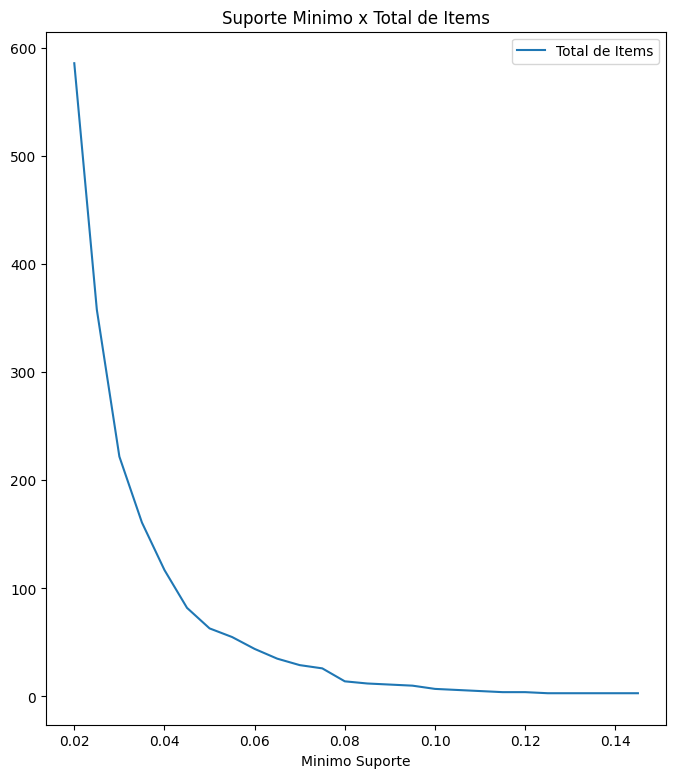

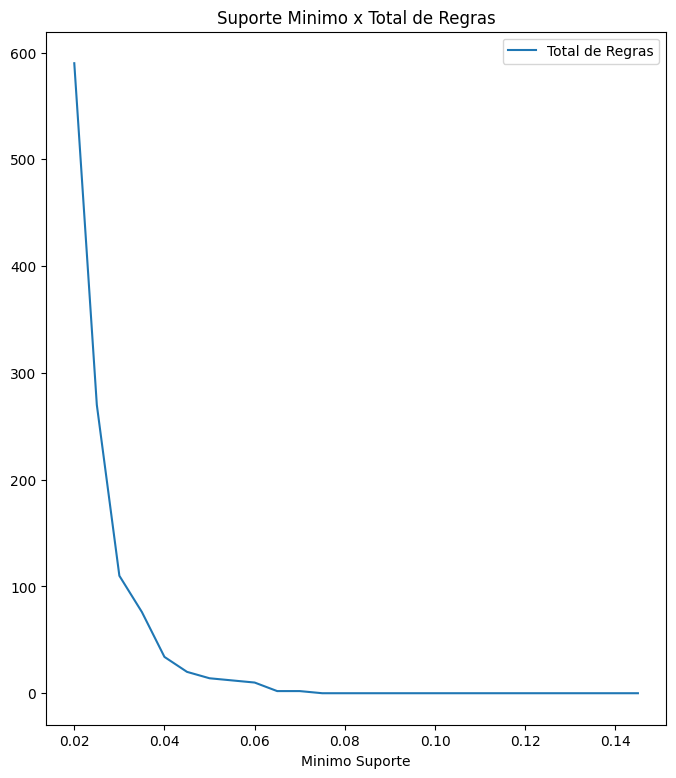

In [12]:
import matplotlib as mpl
i = 0.02
dados = []
while i < 0.15:
    frq_items = apriori(df_customerid, min_support = i, use_colnames = True)
    frq_items = frq_items.sort_values(by='support', ascending=False)
    if frq_items.shape[0] != 0 :
        rules = association_rules(frq_items, metric="lift", min_threshold = 2)
        rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
        dados.append((i, frq_items.shape[0], rules.shape[0]))
    else:
        dados.append((i, frq_items.shape[0], 0))
    i = i + 0.005
pd_df_freq = pd.DataFrame(dados, columns=["Minimo Suporte", "Total de Items", "Total de Regras"])
pd_df_freq.plot(kind="line", x="Minimo Suporte", y= "Total de Items", title="Suporte Minimo x Total de Items", figsize=(8, 9))
pd_df_freq.plot(kind="line",x="Minimo Suporte", y="Total de Regras", title="Suporte Minimo x Total de Regras", figsize=(8, 9))
mpl.rcParams['axes.labelcolor'] = "black"
pd_df_freq

#### Analise Portugal ####

In [14]:
### Analise por pais - Portugal ###

# Dropa linhas com valores nulos
df_customerid = df.dropna(subset=['InvoiceNo'])

# Filtra as colunas que queremos
columns_to_keep = ['InvoiceNo', 'Description', 'Quantity', 'Country']
df_customerid = df_customerid[columns_to_keep]

df_customerid = df_customerid[df_customerid['Country'] == "Portugal"] \
                            .groupby(['InvoiceNo', 'Description'])['Quantity'] \
                            .sum().unstack().reset_index().fillna(0) \
                            .set_index('InvoiceNo')

def hot_encode(x):
    if(x <= 0):
        return 0
    if(x >= 1):
        return 1

df_customerid = df_customerid.applymap(hot_encode)

from mlxtend.frequent_patterns import apriori, association_rules

frq_items = apriori(df_customerid, min_support = 0.13, use_colnames = True)
frq_items = frq_items.sort_values(by='support', ascending=False)

rules = association_rules(frq_items, metric ="lift", min_threshold = 4)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])

frq_items["itemsets"] = frq_items["itemsets"].apply(lambda x: str(list(x)).replace("[", "").replace("]", "").replace("'", "")).astype("unicode")
rules["antecedents"] = rules["antecedents"].apply(lambda x: str(list(x)).replace("[", "").replace("]", "").replace("'", "")).astype("unicode")
rules["consequents"] = rules["consequents"].apply(lambda x: str(list(x)).replace("[", "").replace("]", "").replace("'", "")).astype("unicode")

frq_items.to_excel('resultados/frq_items.xlsx', index=False)
rules.to_excel('resultados/rules.xlsx', index=False)


C:\Users\carlo\AppData\Roaming\Python\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


C:\Users\carlo\AppData\Roaming\Python\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\carlo\AppData\Roaming\Python\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\carlo\AppData\Roaming\Python\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\carlo\AppData\Roaming\Python\Python311\site-packages\mlxtend\frequent_pat

,Minimo Suporte,Total de Items,Total de Regras
0,0.100,110,230
1,0.105,55,60
2,0.110,55,60
3,0.115,55,60
4,0.120,55,60
5,0.125,29,16
6,0.130,29,16
7,0.135,29,16
8,0.140,13,2
9,0.145,13,2


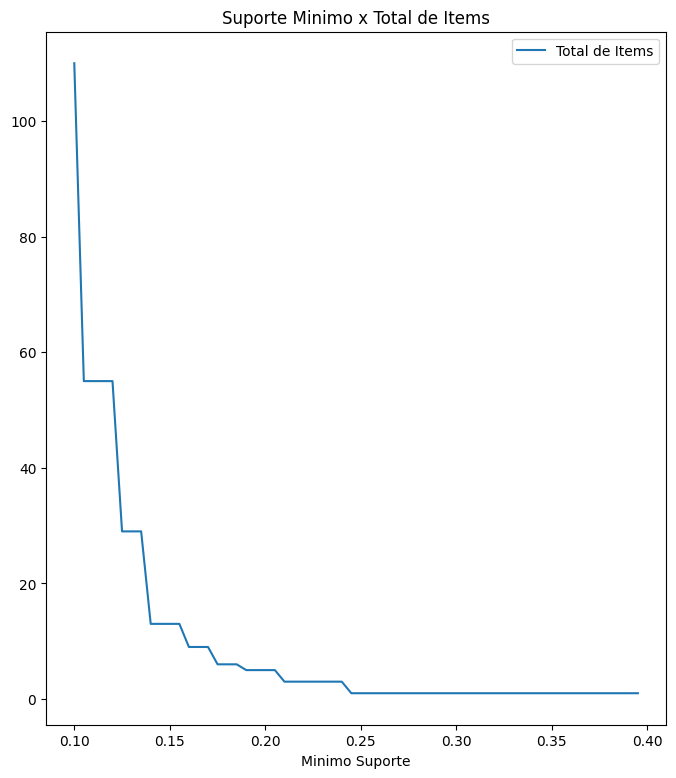

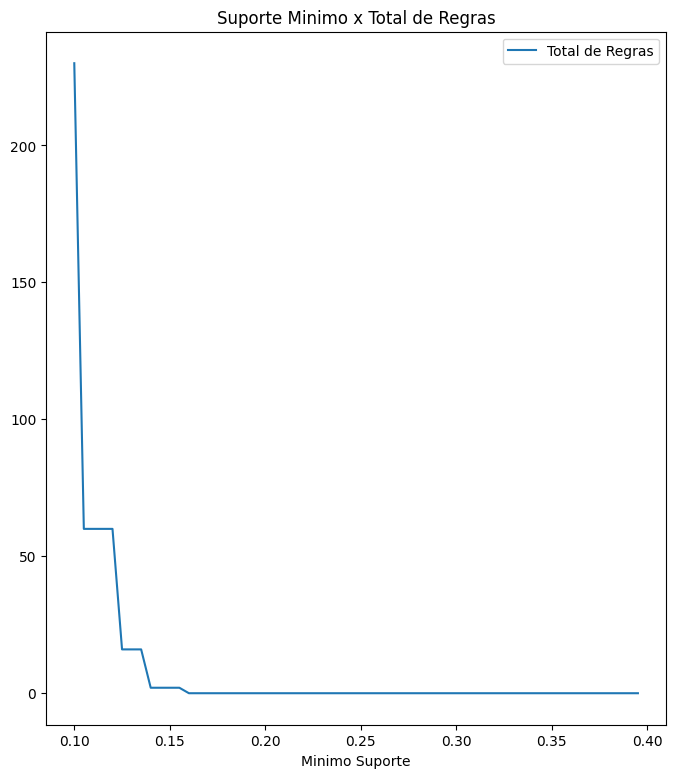

In [15]:
import matplotlib as mpl
i = 0.1
dados = []
while i < 0.4:
    frq_items = apriori(df_customerid, min_support = i, use_colnames = True)
    frq_items = frq_items.sort_values(by='support', ascending=False)
    if frq_items.shape[0] != 0 :
        rules = association_rules(frq_items, metric="lift", min_threshold = 4)
        rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
        dados.append((i, frq_items.shape[0], rules.shape[0]))
    else:
        dados.append((i, frq_items.shape[0], 0))
    i = i + 0.005
pd_df_freq = pd.DataFrame(dados, columns=["Minimo Suporte", "Total de Items", "Total de Regras"])
pd_df_freq.plot(kind="line", x="Minimo Suporte", y= "Total de Items", title="Suporte Minimo x Total de Items", figsize=(8, 9))
pd_df_freq.plot(kind="line",x="Minimo Suporte", y="Total de Regras", title="Suporte Minimo x Total de Regras", figsize=(8, 9))
mpl.rcParams['axes.labelcolor'] = "black"
pd_df_freq